In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
fear_greed_path = "fear_greed_index.csv"
historical_data_path = "historical_data.csv"

fear_greed_df = pd.read_csv(fear_greed_path)
historical_df = pd.read_csv(historical_data_path)

fear_greed_df.info(), fear_greed_df.head(), historical_df.info(), historical_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

(None,
     timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
 None,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09  

In [16]:
historical_df["Timestamp IST"] = pd.to_datetime(historical_df["Timestamp IST"], format="%d-%m-%Y %H:%M")
historical_df["date"] = historical_df["Timestamp IST"].dt.date

fear_greed_df["date"] = pd.to_datetime(fear_greed_df["date"]).dt.date

merged_df = pd.merge(historical_df, fear_greed_df[["date", "classification"]], on="date", how="left")

merged_df.info(), merged_df["classification"].value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

(None,
 classification
 Fear             61837
 Greed            50303
 Extreme Greed    39992
 Neutral          37686
 Extreme Fear     21400
 NaN                  6
 Name: count, dtype: int64)

In [11]:
# Average Closed PnL by Sentiment
avg_pnl = merged_df.groupby("classification")["Closed PnL"].mean().sort_values(ascending=False)
print("Average Closed PnL by Market Sentiment:\n")
print(avg_pnl)

Average Closed PnL by Market Sentiment:

classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64


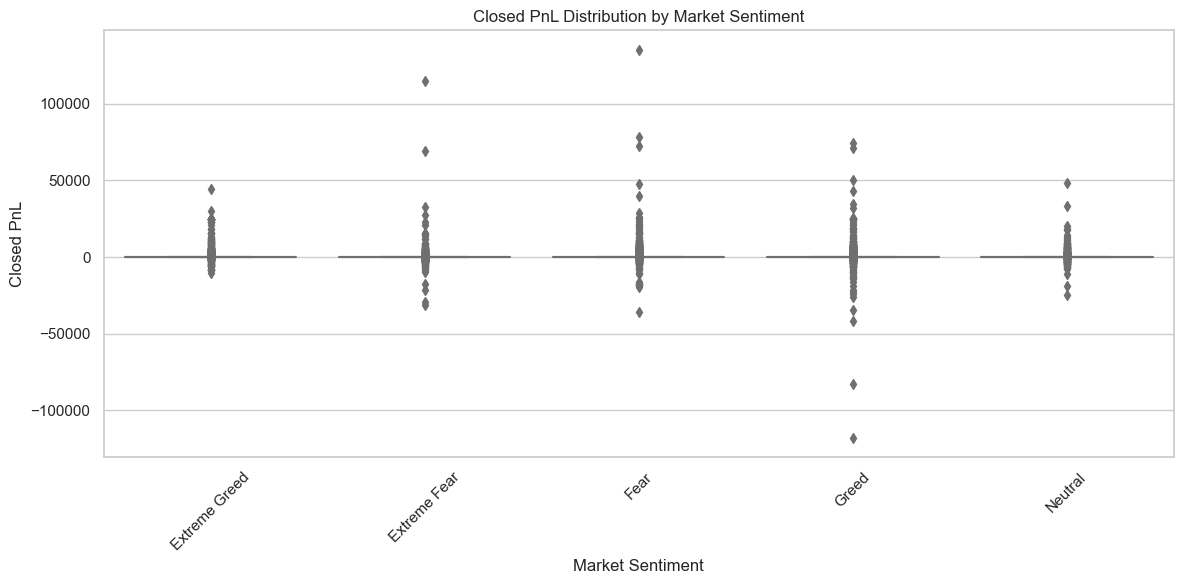

In [21]:
# Boxplot of PnL by Sentiment
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x="classification", y="Closed PnL",data=merged_df,palette="pastel")
plt.title("Closed PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

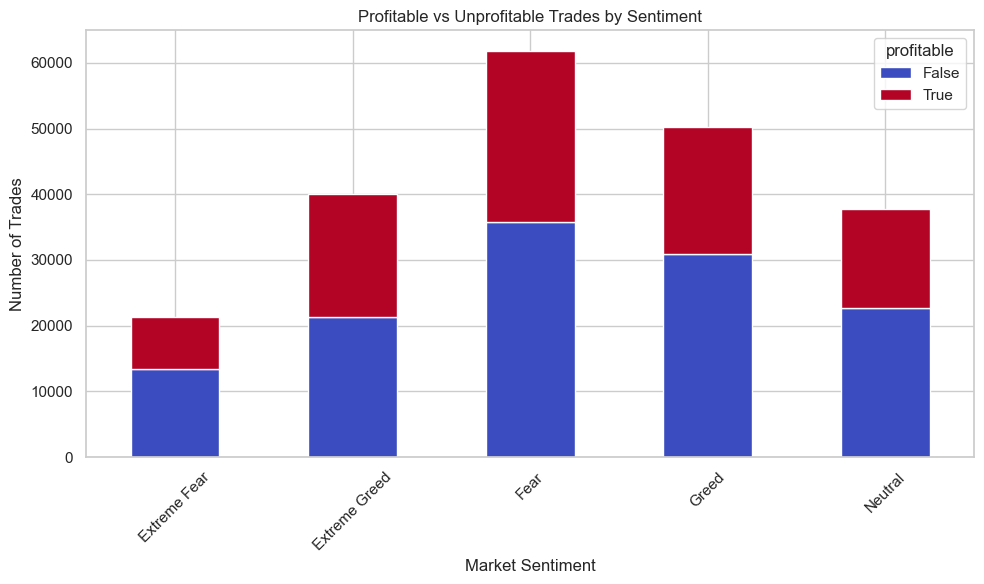

In [23]:
# Profitability Analysis
merged_df["profitable"] = merged_df["Closed PnL"] > 0
profit_counts = merged_df.groupby(["classification", "profitable"]).size().unstack().fillna(0)

profit_counts.plot(kind="bar", stacked=True, colormap="coolwarm")
plt.title("Profitable vs Unprofitable Trades by Sentiment")
plt.ylabel("Number of Trades")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

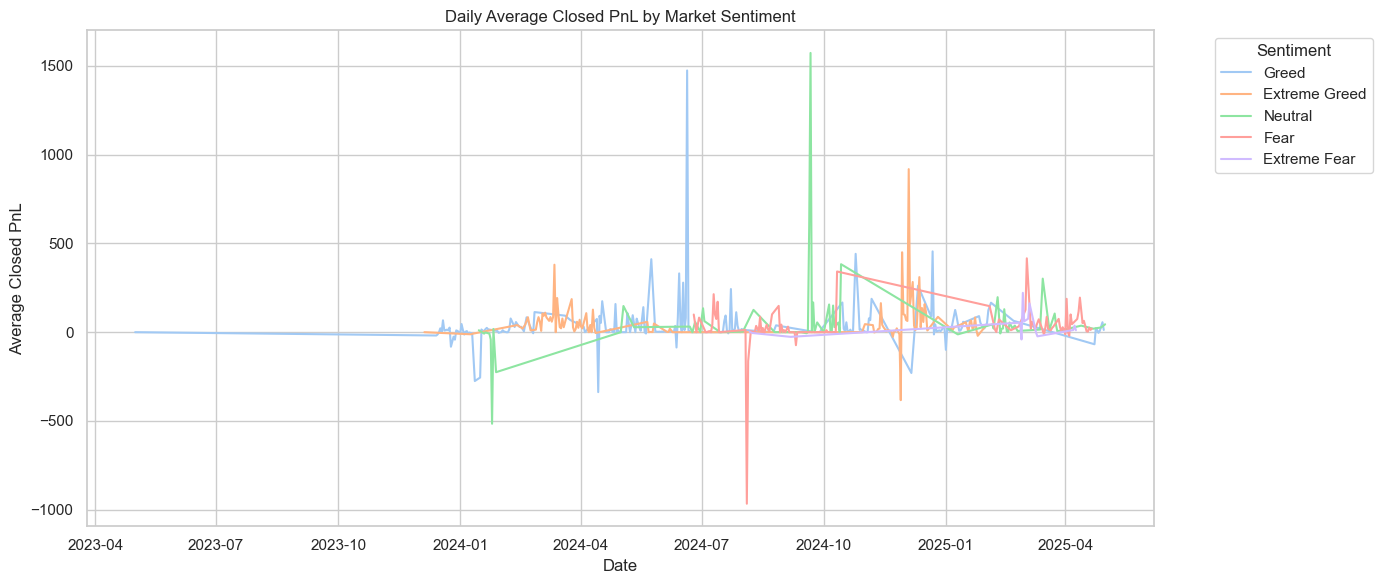

In [24]:
# Daily Average PnL Trend by Sentiment
daily_stats = merged_df.groupby(["date", "classification"])["Closed PnL"].mean().reset_index()
daily_stats.columns = ["date", "classification", "avg_closed_pnl"]
daily_stats.sort_values("date", inplace=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_stats, x="date", y="avg_closed_pnl", hue="classification", palette="pastel")
plt.title("Daily Average Closed PnL by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Average Closed PnL")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()